# Исследование объявлений о продаже квартир  
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  

**Задачи:**  
- Исследовать параметры для определения рыночной стоимости объектов недвижимости
- Отследить аномалии в данных, установить возможные причины их появления

## Описание признаков  
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
- balcony — число балконов  
- ceiling_height — высота потолков (м)  
- cityCenters_nearest — расстояние до центра города (м)  
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
- first_day_exposition — дата публикации  
- floor — этаж   
- floors_total — всего этажей в доме   
- is_apartment — апартаменты (булев тип)  
- kitchen_area — площадь кухни в квадратных метрах (м²)   
- last_price — цена на момент снятия с публикации     
- living_area — жилая площадь в квадратных метрах (м²)  
- locality_name — название населённого пункта  
- open_plan — свободная планировка (булев тип)  
- parks_around3000 — число парков в радиусе 3 км  
- parks_nearest — расстояние до ближайшего парка (м)  
- ponds_around3000 — число водоёмов в радиусе 3 км  
- ponds_nearest — расстояние до ближайшего водоёма (м)  
- rooms — число комнат  
- studio — квартира-студия (булев тип)  
- total_area — общая площадь квартиры в квадратных метрах (м²)  
- total_images — число фотографий квартиры в объявлении  

## 1. Предварительный анализ данных

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

data = pd.read_csv('real_estate_data.csv', delimiter='\t')

In [127]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [128]:
data.shape

(23699, 22)

In [129]:
data.duplicated().value_counts()

False    23699
dtype: int64

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что явных дубликатов не оказалось, но в данных есть множество пустых значений в большинстве столбцов.  
Рассмотрим каждый столбец детально.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

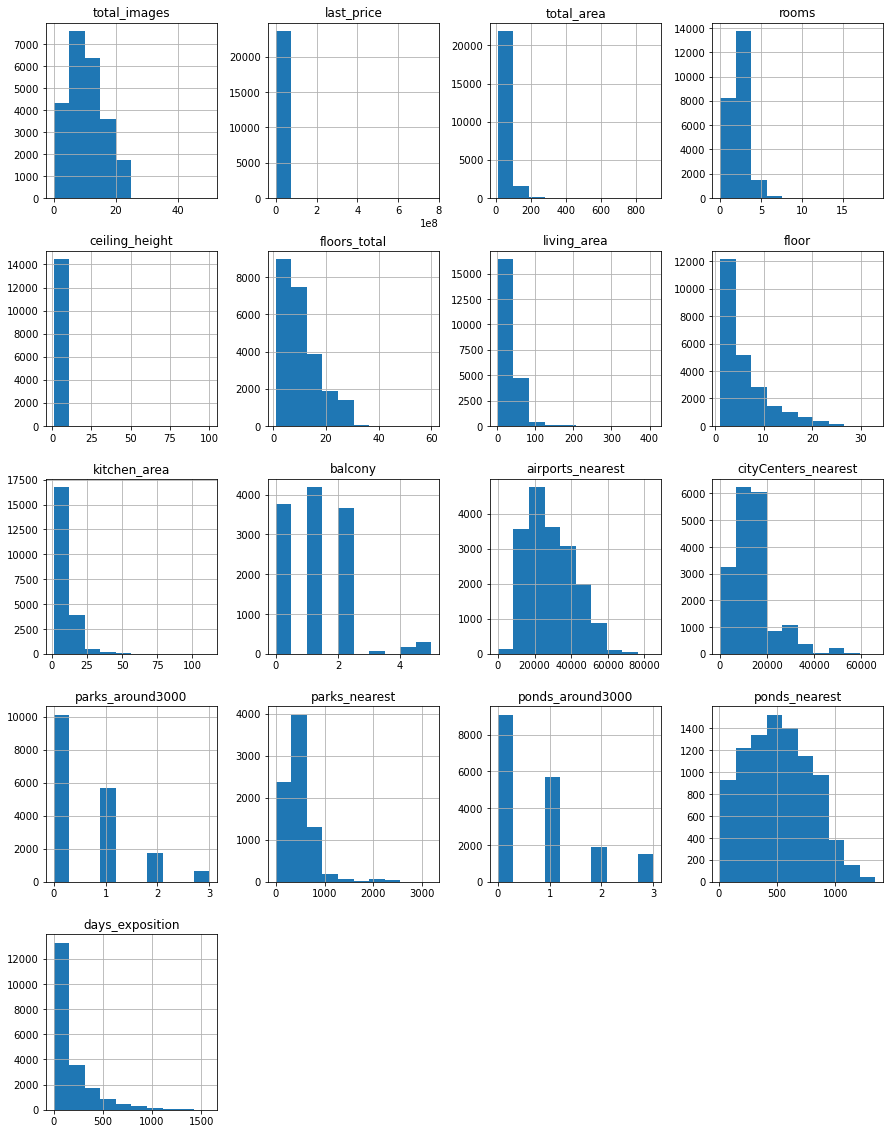

In [131]:
data.hist(figsize=(15, 20))

**Вывод:** Видим, что только в первых 5 колонках из 22 отсутствуют пустые значения, а подавляющее большинство признаков необоснованно приведено к типу float - попытаемся всё это исправить в дальнейшем. Явных дубликатов в таблице не оказалось. Распределения кажутся близкими к нормальным и особых аномалий на этом этапе не замечено, однако ситуация может поменяться при детальном рассмотрении.

## 2. Предобработка данных

### Количество фото в объявлении

<AxesSubplot:>

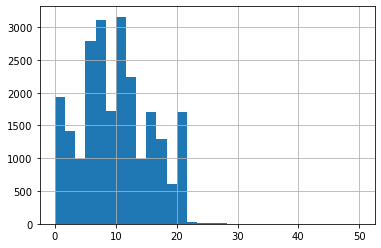

In [132]:
data['total_images'].hist(bins=30)

Количество фотографий в объявлениях везде корректно и не требует вмешательства.

### Цена на момент снятия с публикации

In [133]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2978, dtype: int64

Цену на момент публикации можно привести к типу integer.

In [134]:
data['last_price'] = data['last_price'].astype('int')

### Общая площадь

In [135]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь квартиры в датасете составляет 12 кв. метров, а максимальная - 900.  
Взглянем на квартиры с большими площадями, чтобы попытаться распознать аномалии.

In [136]:
data[data['total_area'] > 150].sort_values(by='total_area', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


Видим, что квартиры с огромной площадью отнюдь не являются аномалией.

### Дата публикации объявления

In [137]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

В столбце даты публикации не указано точное время, поэтому стоит убрать лишние нули для удобства восприятия.

In [138]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].sample(1)

9319   2017-04-27
Name: first_day_exposition, dtype: datetime64[ns]

### Количество комнат

<AxesSubplot:>

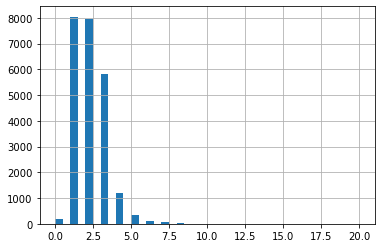

In [139]:
data['rooms'].hist(bins=40, range=(0, 20))

### Высота потолков

In [140]:
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [141]:
data['ceiling_height'].median()

2.65

В российских квартирах высота потолков обычно составляет 2.5-2.7 метра, что совпадает с медианным значением по датасету. Потолки выше 3 метров встречаются в жилье премиального класса, а до 4 метров - в квартирах "сталинского" образца.  

Таким образом, значения высоты потолка более 4 метров можно считать аномально высокими.

In [142]:
data[data['ceiling_height'] > 4].sort_values('ceiling_height', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


Стоит заметить, что по-настоящему аномальных высот в данных немного, а найденные значения свыше 10 метров, возможно, были просто некорректно записаны.  

Разделив их на 10, мы получим нормальные значения, входящие в стандартный диапазон.  
Пропуски в столбце заполним медианным значением.  


In [143]:
#Делим огромные высоты на 10
data.loc[data['ceiling_height'] > 9, 'ceiling_height'] = data.loc[data['ceiling_height'] > 9, \
                                                                       'ceiling_height']/10
#Убираем аномально низкие и аномально высокие объекты
data.loc[(data['ceiling_height'] < 2)|(data['ceiling_height'] > 6), \
                                            'ceiling_height'] = data['ceiling_height'].median()

#Заполняем пустоты, отталкиваясь от района и высоты потолков
data['ceiling_height'] = data.groupby(['locality_name','floors_total']) \
                                      ['ceiling_height'].apply(lambda x: x.fillna(x.median()))

#Добиваем остатки пустот первоначальным вариантом заполнения
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

### Всего этажей в доме

Существует множество разных стандартов застройки, от которых зависит количество этажей в домах.  
Так, например, в сталинках количество этажей составляет от 3 до 5, в брежневках от 9 до 12 и т.д.  

Попробуем заполнить пропуски в колонке, отталкиваясь от этих показателей и учитывая этаж рассматриваемой квартиры.

In [144]:
#data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()).astype('int')
default_floors_total = [3, 5, 9, 12, 18, 24]

for floor in default_floors_total:
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= floor), 'floors_total'] = floor
data['floors_total'] = data['floors_total'].astype('int')

<AxesSubplot:>

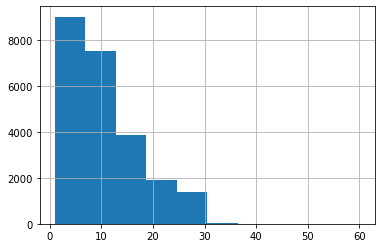

In [145]:
data['floors_total'].hist()

Аномальных значений нет

### Жилая площадь

Посчитаем средний процент жилой площади от общей и заполним пропуски в соответствии с этим соотношением.  
Причиной возникновения пустот могло послужить простое отсутствие сведений и замеров конкретно жилой площади.

In [146]:
data['living_area'] = data['living_area'].fillna(data['total_area']*
                                        (data['living_area'].median()/data['total_area'].median()))

### Количество этажей

<AxesSubplot:>

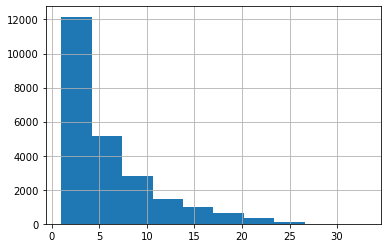

In [147]:
data['floor'] = data['floor'].astype('int')
data['floor'].hist()

Аномальных значений не обнаружено.

### Апартаменты, студии и планировки

Невозможно заполнить пустые значения, ведь сложно отталкиваться от чего-либо и утверждать, что недвижимость является апартаментами или студией. Такая же ситуация с наличием открытой планировки.

### Площадь кухни

В случае с кухней с пустыми значениями можно разобраться по тому же принципу, что и с жилой площадью.

In [148]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*
                                        (data['kitchen_area'].median()/data['total_area'].median()))

### Количество балконов

In [149]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Количество балконов нецелесообразно хранить float-значением, преобразуем в integer.  
Если их количество не указано, справедливо считать его равным нулю.

In [150]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].sample(1)

6326    0
Name: balcony, dtype: int32

### Дни с публикации до снятия
Количество дней целесообразнее хранить целочисленным значением.  
Пропуски, вероятно, возникли в объявлениях, которые были активными на момент выгрузки данных.

In [151]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

### Названия населённых пунктов
Первым делом стоит привести все значения к единому регистру, чтобы убрать дубликаты, вызванные использованием неправильного регистра при написании, если таковые присутствуют.

In [152]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

### Остальное
В оставшихся столбцах воспримем отсутствие значения как отсутствие рассматриваемого объекта и укажем 0.  
Следует и поменять тип данных.

In [153]:
data['airports_nearest'] = data['airports_nearest'].fillna(0).astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype('int')

В результате некоторых манипуляций нам удалось значительно уменьшить количество пропущенных значений в датасете.

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int32         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## 2.1. Формирование новых признаков на основе существующих

### Создадим столбец с ценой за квадратный метр

In [155]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data['price_per_square_meter'].sample(1)

20638    88000
Name: price_per_square_meter, dtype: int32

### Добавим новые столбцы с днём, неделей и годом публикации объявления

In [156]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

### Соотнесём объявления по категориям этажа: 'первый', 'последний' и 'другой'

In [157]:
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
      
data['floor_type'] = data.apply(categorize_floor, axis = 1)
data['floor_type'].sample(1)

19435    другой
Name: floor_type, dtype: object

### Добавим столбец с расстоянием до ближайшего городского центра в километрах

In [158]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).astype('int')
data['cityCenters_nearest_km'].sample(1)

6533    13
Name: cityCenters_nearest_km, dtype: int32

## 3. Исследовательский анализ данных

### Общая площадь

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

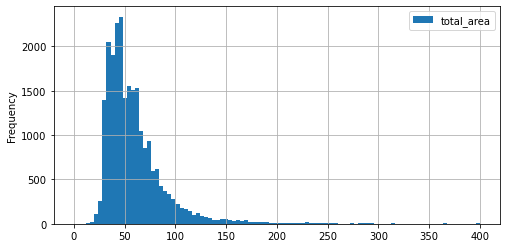

In [159]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(8,4), range=(0,400))
data['total_area'].describe()

**Вывод:** Распределение нормальное, имеются небольшие выбросы, однако они не оказывают негативного влияния. Общая картина видна по описанию.

### Жилая площадь

count    23699.000000
mean        34.624296
std         22.381873
min          2.000000
25%         19.000000
50%         30.000000
75%         42.173077
max        409.700000
Name: living_area, dtype: float64

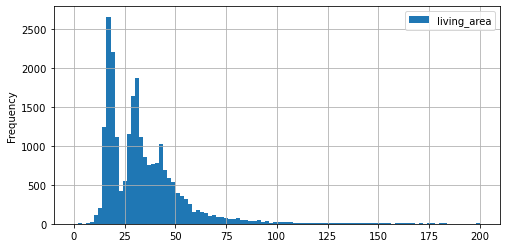

In [160]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(8,4), range=(0,200))
data['living_area'].describe()

**Вывод:** Обнаружены 3 необычных пика, но есть преположение, что это некие "переходные точки" между однокомнатными, двухкомнатными и трёхкомнатными квартирами.

### Площадь кухни

count    23699.000000
mean        10.505495
std          6.039401
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

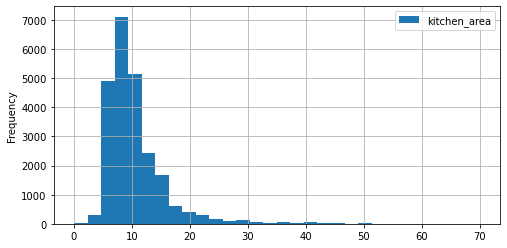

In [161]:
data.plot(y='kitchen_area', kind='hist', bins=30, grid=True, figsize=(8,4), range=(0,70))
data['kitchen_area'].describe()

**Вывод:** Распределение вполне нормальное, выбросы не критичны.

### Цена объекта

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

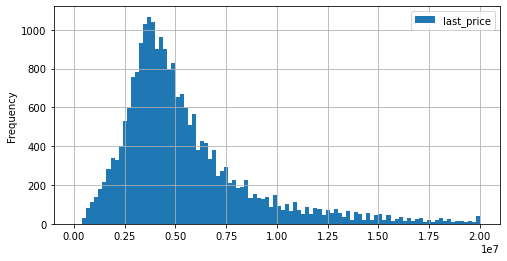

In [162]:
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(8,4), range=(0,20000000))
data['last_price'].describe()

**Вывод:** С данными всё в порядке, даже не обнаружено сильных аномалий и выбросов.

### Количество комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

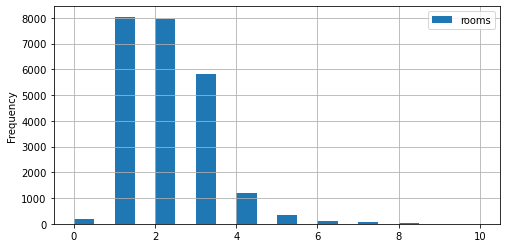

In [163]:
data.plot(y='rooms', kind='hist', bins=20, grid=True, figsize=(8,4), range=(0,10))
data['rooms'].describe()

**Вывод:** С количеством комнат тоже всё в полном порядке.

### Высота потолков

count    23699.000000
mean         2.707428
std          0.239348
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

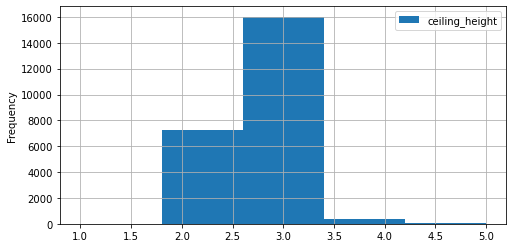

In [164]:
data.plot(y='ceiling_height', kind='hist', bins=5, grid=True, figsize=(8,4), range=(1,5))
data['ceiling_height'].describe()

**Вывод:** Высоты потолков распределились строго по категориям на обычные, высокие и очень высокие. Выбросы были удалены ранее.

### Этаж квартиры

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

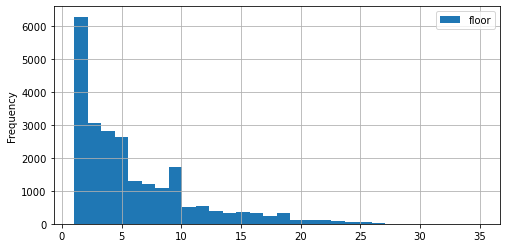

In [165]:
data.plot(y='floor', kind='hist', bins=30, grid=True, figsize=(8,4), range=(1,35))
data['floor'].describe()

**Вывод:** С этажами тоже всё в порядке. Аномалий и критичных выбросов не обнаружено.

### Тип этажа квартиры

<AxesSubplot:xlabel='floor_type', ylabel='count'>

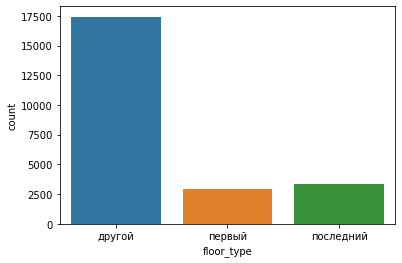

In [166]:
sns.countplot(data['floor_type'])

### Общее количество этажей в доме

count    23699.000000
mean        10.677413
std          6.598081
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

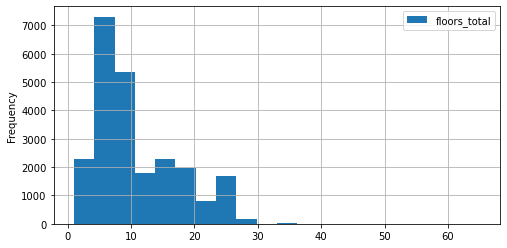

In [167]:
data.plot(y='floors_total', kind='hist', bins=20, grid=True, figsize=(8,4), range=(1,65))
data['floors_total'].describe()

**Вывод:** Данные об общем количестве этажей тоже не содержат аномалий.

### Расстояние до центра города в метрах

count    23699.000000
mean     10886.426896
std       9634.613697
min          0.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

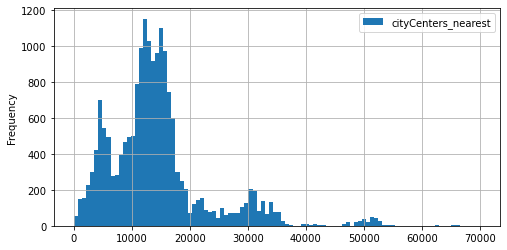

In [168]:
data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True, figsize=(8,4), range=(1,70000))
data['cityCenters_nearest'].describe()

**Вывод:** Количество продаваемых домов в зависимости от расстояния до центра также приведено в соответствии с нормой.

### Расстояние до ближайшего аэропорта

count    23699.000000
mean     22060.285497
std      16455.276292
min          0.000000
25%      10196.500000
50%      21869.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

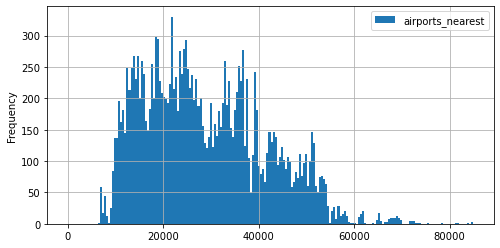

In [169]:
data.plot(y='airports_nearest', kind='hist', bins=200, grid=True, figsize=(8,4), range=(1,85000))
data['airports_nearest'].describe()

**Вывод:** Аэропорты в России обычно находятся на расстоянии от городов, так что здесь тоже всё хорошо.

### Расстояние до ближайшего парка

count    23699.000000
mean       167.315499
std        306.709997
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

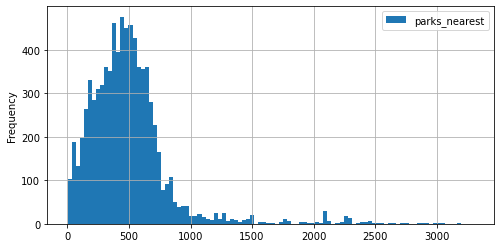

In [170]:
data.plot(y='parks_nearest', kind='hist', bins=100, grid=True, figsize=(8,4), range=(1,3300))
data['parks_nearest'].describe()

**Вывод:** Аномалий и необычных выбросов здесь тоже нет.

### День и месяц публикации

<AxesSubplot:ylabel='Frequency'>

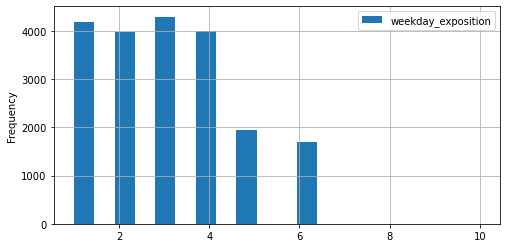

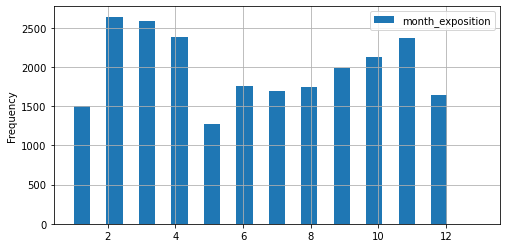

In [171]:
data.plot(y='weekday_exposition', kind='hist', bins=20, grid=True, figsize=(8,4), range=(1,10))
data.plot(y='month_exposition', kind='hist', bins=25, grid=True, figsize=(8,4), range=(1,13))

**Вывод:** По графикам отлично видна динамика продаж квартир по дням недели и месяцам.

### Как быстро продавались квартиры?

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

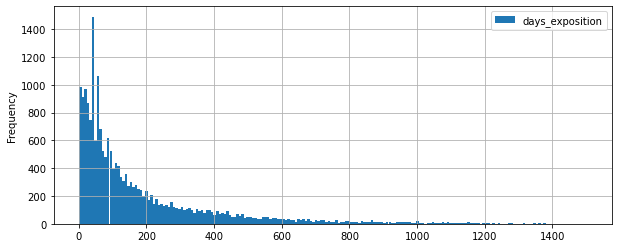

In [172]:
data.plot(y='days_exposition', kind='hist', bins=200, grid=True, figsize=(10,4), range=(1,1500))
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

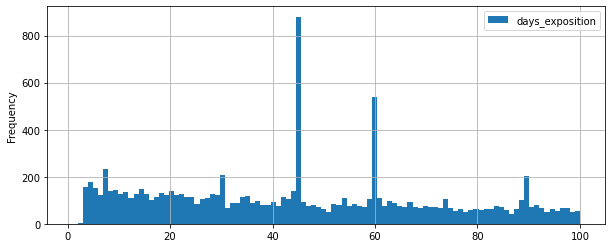

In [173]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(10,4), range=(1,100))
data['days_exposition'].describe()

Огромные пики обнаружены в самом начале гистограммы.   
Рассмотрев поближе эту зону, понимаем что они находятся на значениях в 45, 60 и 90 дней с момента публикации.  
Изучим особенности строк с такими значениями.  

In [174]:
data[data['days_exposition'] == 45].sample(10)
#data[data['days_exposition'] == 60].sample(10)
#data[data['days_exposition'] == 90].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
20313,9,3700000,46.0,2018-06-25,1,2.50,16,26.538462,14,NaN,...,0,3,369,45,80434,0,6,2018,другой,5
13840,7,1400000,35.8,2018-06-15,1,2.60,5,20.653846,5,NaN,...,0,0,0,45,39106,4,6,2018,последний,0
15485,0,3100000,33.0,2017-07-12,1,2.55,9,18.000000,6,NaN,...,0,1,955,45,93939,2,7,2017,другой,10
8660,7,1850000,31.0,2018-03-17,1,2.50,5,17.884615,2,NaN,...,0,0,0,45,59677,5,3,2018,другой,0
524,10,3800000,74.4,2017-05-18,3,2.50,5,44.400000,3,False,...,0,0,0,45,51075,3,5,2017,другой,0
23259,2,3800000,38.6,2018-01-11,1,2.55,10,22.269231,9,NaN,...,0,1,896,45,98445,3,1,2018,другой,11
4230,0,3250000,51.0,2017-05-13,2,2.50,9,31.000000,4,NaN,...,0,1,611,45,63725,5,5,2017,другой,31
19147,12,2300000,33.0,2018-01-11,1,2.50,10,19.038462,3,NaN,...,0,0,0,45,69696,3,1,2018,другой,0
14081,3,3000000,39.0,2018-10-31,1,2.65,17,15.500000,11,NaN,...,0,0,0,45,76923,2,10,2018,другой,0
22237,0,4000000,37.0,2017-08-13,1,2.70,10,19.000000,10,NaN,...,0,0,0,45,108108,6,8,2017,последний,12


Видим, что ничего особенного в этих данных нет.  
Значения в 45, 60 и 90 дней с момента публикации посчитаем аномальными и удалим.  
Построим диаграмму заново.

count    22077.000000
mean       164.027404
std        219.391854
min          0.000000
25%         19.000000
50%         83.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

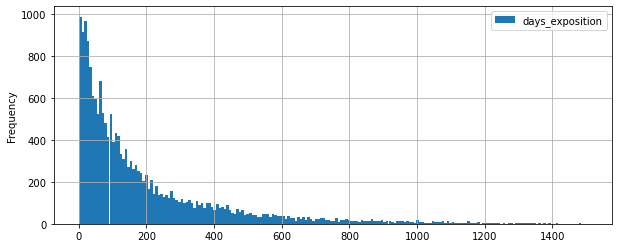

In [175]:
bad_days = [45, 60, 90]
good_data = data.query('days_exposition not in @bad_days')

good_data.plot(y='days_exposition', kind='hist', bins=200, grid=True, figsize=(10,4), range=(1,1500))
good_data['days_exposition'].describe()

**Вывод:** Изучив гистограмму и показатели метода describe, можно прийти к заключению, что нормальным временем продажи является срок от 19 (25%) до 214 (75%) дней. Продажи меньше 19 дней - очень быстрые, а больше 214 - довольно долгие. Продажи больше 600 дней можно считать аномально долгими.

## 3.1. Факторы, влияющие на общую стоимость объекта

### Зависимость цены от общей площади

0.6536750579657242

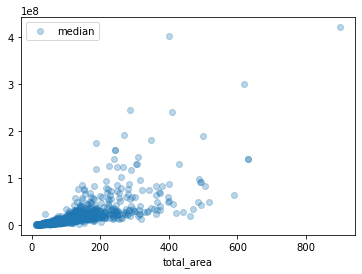

In [176]:
total_area_dependent = data.pivot_table(index='total_area', values='last_price', \
                                        aggfunc=['count', 'median'])

total_area_dependent.columns = ['count', 'median']
total_area_dependent.plot(y='median', style='o', alpha=0.3)

total_area_dependent.sort_values('median', ascending=False)
data['total_area'].corr(data['last_price'])

**Вывод:** Корреляция оказалась чуть выше среднего, что говорит о наличии хорошей зависимости цены недвижимости от её общей площади. Чем выше площадь, тем больше становится цена.

### Зависимость цены от жилой площади

0.5858907700395647

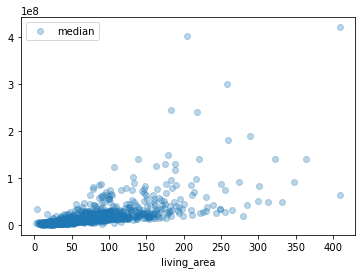

In [177]:
living_area_dependent = data.pivot_table(index='living_area', values='last_price', \
                                        aggfunc=['count', 'median'])

living_area_dependent.columns = ['count', 'median']
living_area_dependent.plot(y='median', style='o', alpha=0.3)

living_area_dependent.sort_values('median', ascending=False)
data['living_area'].corr(data['last_price'])

In [178]:
data['living_area'].corr(data['total_area'])

0.9462534256263019

**Вывод:** Неудивительно, что результаты оказались очень похожими на показатели общей площади, ведь  жилая площадь напрямую зависит от общей площади квартиры.

### Зависимость цены от площади кухни

0.5141194369951927

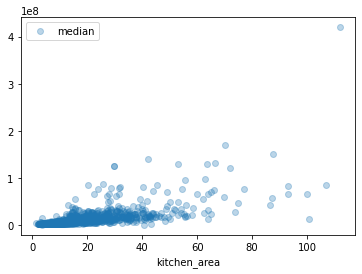

In [179]:
kitchen_area_dependent = data.pivot_table(index='kitchen_area', values='last_price', \
                                        aggfunc=['count', 'median'])

kitchen_area_dependent.columns = ['count', 'median']
kitchen_area_dependent.plot(y='median', style='o', alpha=0.3)

kitchen_area_dependent.sort_values('median', ascending=False)
data['kitchen_area'].corr(data['last_price'])

In [180]:
data['kitchen_area'].corr(data['total_area'])

0.6604806456507752

**Вывод:** Ситуация с жилой площадью практически повторяется. Корреляция в данном случае стала ещё ниже, как и зависимость общей стоимости.

### Зависимость цены от количества комнат

0.3633428499648938

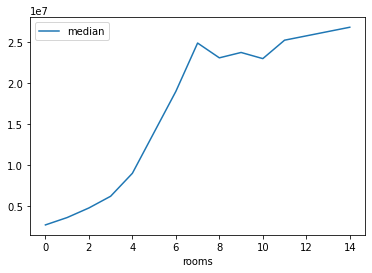

In [181]:
rooms_dependent = data.pivot_table(index='rooms', values='last_price', \
                                   aggfunc = ['count', 'median'])

rooms_dependent.columns = ['count', 'median']
rooms_dependent.query('count > 1').plot(y='median')

rooms_dependent.query('count > 1').sort_values('median', ascending=False)
data['rooms'].corr(data['last_price'])

**Вывод:** Корреляция оказалась не слишком высокой, но если судить по графику, то при небольшом количестве комнат стоимость недвижимости имеет некую зависимость, однако на больших значениях линия начинает ломаться. Можно сделать вывод, что общая стоимость не слишком сильно зависит от количества комнат.

### Зависимость цены от типа этажа

,count,median
floor_type,,
первый,2917,3900000
последний,3360,4300000


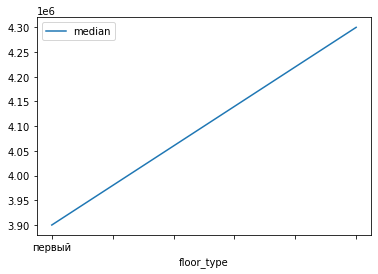

In [182]:
floor_type_dependent = data.query('floor_type != "другой"') \
                           .pivot_table(index='floor_type', values='last_price', \
                                        aggfunc=['count', 'median'])

floor_type_dependent.columns = ['count', 'median']
floor_type_dependent.plot(y='median')
floor_type_dependent

**Вывод:** Известный факт, что жильё на первых этажах ценится меньше. Чем выше этаж, тем больше стоимость жилья.

### Зависимость цены от даты размещения объявления

,count,median
weekday_exposition,,
1,4183,4730000
2,3974,4700000
0,3612,4650000
3,4295,4650000
4,4000,4585000
5,1936,4555000
6,1699,4550000


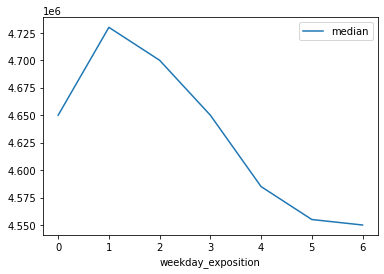

In [183]:
weekday_dependent = data.pivot_table(index='weekday_exposition', values='last_price',\
                                     aggfunc=['count', 'median'])

weekday_dependent.columns = ['count', 'median']
weekday_dependent.plot(y='median')
weekday_dependent.sort_values('median', ascending=False)

,count,median
month_exposition,,
4,2379,4800000
9,1981,4700000
11,2371,4700000
12,1641,4700000
2,2640,4650000
3,2587,4650000
7,1695,4650000
1,1500,4600000
8,1744,4570000


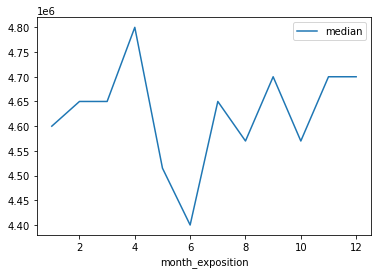

In [184]:
month_dependent = data.pivot_table(index='month_exposition', values='last_price', \
                                   aggfunc=['count', 'median'])
month_dependent.columns = ['count', 'median']
month_dependent.plot(y='median')

month_dependent.sort_values('median', ascending=False)

**Вывод:** В рабочие дни недели стоимость оказывается более высокой, чем в выходные. Сезоны тоже оказывают на это влияние - в апреле стоимость оказалась наиболее высокой, а в июне - наиболее низкой.

### Cредняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [185]:
top_locality = data.pivot_table(index='locality_name', \
                                values='price_per_square_meter', aggfunc=['count', 'mean'])
top_locality.columns = ['count', 'mean']
top_locality = top_locality.sort_values('count', ascending=False).head(10)
top_locality

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231
посёлок мурино,522,85751.733716
посёлок шушары,440,78676.904545
всеволожск,398,68654.007538
пушкин,369,103125.373984
колпино,338,75424.150888
посёлок парголово,327,90175.489297
гатчина,307,68745.693811
деревня кудрово,299,92473.086957


In [186]:
top_locality[top_locality['mean']==top_locality['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231


In [187]:
top_locality[top_locality['mean']==top_locality['mean'].min()]

,count,mean
locality_name,,
выборг,237,58141.489451


**Вывод:** Самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге, а самая низкая - в Выборге.

### Цена каждого километра от центра Санкт-Петербурга

                          last_price
cityCenters_nearest_km              
1                       1.885085e+07
2                       1.616331e+07
3                       1.343683e+07
4                       1.363202e+07
5                       1.530612e+07


<AxesSubplot:xlabel='cityCenters_nearest_km'>

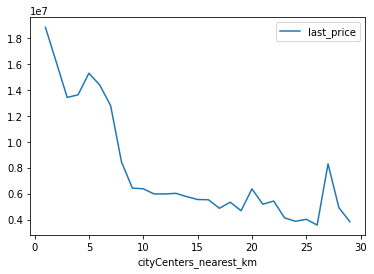

In [188]:
spb_km_mean_price = data.query('locality_name == "санкт-петербург" and cityCenters_nearest_km != 0') \
                        .pivot_table(index='cityCenters_nearest_km', \
                                     values='last_price', aggfunc='mean')
    
print(spb_km_mean_price.head(5))
spb_km_mean_price.plot()

**Вывод:** Как и ожидалось, чем дальше жильё располагается от центра города, тем меньше становится стоимость его квадратного метра. Аномальные пики на графике, вероятно, вызваны нахождением в этих зонах дорогого элитного жилья.

## 4. Общий вывод

Итого, в результате работы мы изучили множество разных аспектов продажи недвижимости. Разобрались с пропущенными значениями и типами данных, устранили аномалии и сформировали новые признаки в датасете.
Подробнее изучили параметры и решили ряд поставленных задач.  
  
При дальнейшем сборе данных стоит обратить внимание на корректность высоты потолков и общего количества этажей.  

- Квартиры в самом центре Санкт-Петебурга оказались наиболее дорогими, что не удивительно.  
- Большую часть составляет 5-7 этажная застройка.  
- Больше всего ценится жильё на последних этажах домов, менее всего - на первых.
- Наиболее благоприятное время для продажи недвижимости - весна, а для покупки - лето.  
- Большая часть недвижимости продаётся в начале недели.